#Objective
In this project,
I have to predict whether a patient has a low chance of a heart attack or
a high chance according to the medical information of a patient?!

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


Load Data From CSV File

In [ ]:
df = pd.read_csv('heart.csv')
df.head()
# df['output'].hist()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


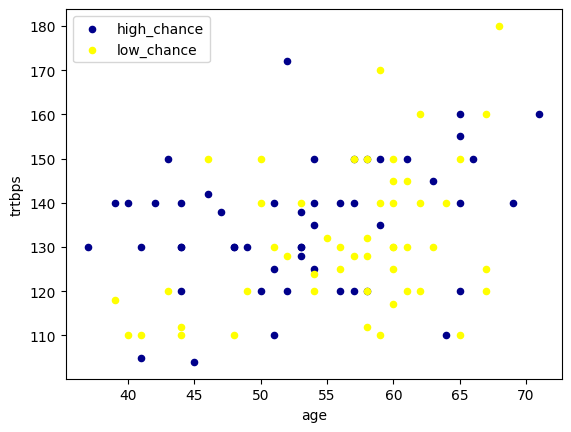

In [ ]:
ax = df[df['output'] == 1][0:50].plot(kind='scatter', x='age', y='trtbps', color='DarkBlue', label='high_chance');
df[df['output'] == 0][0:50].plot(kind='scatter', x='age', y='trtbps', color='Yellow', label='low_chance', ax=ax);
plt.show()

### Meaning of the column:

exng:    Does the pain start with a specific activity?
Number 1 means yes

0 means no

"""
(cp) : number of main vessels:

A value from 0 to 3

"""
(caa) : type of chest pain:

Value 1: direct heart pain

Value 2: Indirect pain that leads to feeling pain in the heart

Value 3: non-cardiac pain

Value 4: No symptoms

"""
(trtbps) : resting blood pressure

"""
(chol) : blood fat

"""

(fbs) : High fasting blood sugar - diabetes

It has a value of  1

0 value: none

"""
(rest_ecg) : The result of the resting ECG

0 value: normal

Value 1: the ST segment of the ECG is abnormal

Value 2: Probably or definitely the left ventricle is large

"""
(thalach) : maximum heart rate

"""
(target) : chance of heart attack

0 value: low chance

Value 1: high chance



In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
df['oldpeak'].value_counts()

oldpeak
0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: count, dtype: int64

###Data pre-processing and selection

Let's select some features for the modeling. Also, we change  the type of  'oldpeak' column to be an integer, as it is a requirement by the skitlearn algorithm:

In [ ]:
df['oldpeak'] = df['oldpeak'].astype('int')
df.dtypes

age         int64
sex         int64
cp          int64
trtbps      int64
chol        int64
fbs         int64
restecg     int64
thalachh    int64
exng        int64
oldpeak     int64
slp         int64
caa         int64
thall       int64
output      int64
dtype: object

Let's define X, and y for our dataset:

In [ ]:
cleaned_df = df[['age', 'sex', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'thall', 'cp']]
X = np.asarray(cleaned_df)
X[0:5]

array([[ 63,   1, 233,   1,   0, 150,   0,   1,   3],
       [ 37,   1, 250,   0,   1, 187,   0,   2,   2],
       [ 41,   0, 204,   0,   0, 172,   0,   2,   1],
       [ 56,   1, 236,   0,   1, 178,   0,   2,   1],
       [ 57,   0, 354,   0,   1, 163,   1,   2,   0]])

In [ ]:
y = np.asarray(df['output'])
y [0:5]

array([1, 1, 1, 1, 1])

Also, we normalize the dataset:

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.9521966 ,  0.68100522, -0.25633371,  2.394438  , -1.00583187,
         0.01544279, -0.69663055, -2.14887271,  1.97312292],
       [-1.91531289,  0.68100522,  0.07219949, -0.41763453,  0.89896224,
         1.63347147, -0.69663055, -0.51292188,  1.00257707],
       [-1.47415758, -1.46841752, -0.81677269, -0.41763453, -1.00583187,
         0.97751389, -0.69663055, -0.51292188,  0.03203122],
       [ 0.18017482,  0.68100522, -0.19835726, -0.41763453,  0.89896224,
         1.23989692, -0.69663055, -0.51292188,  0.03203122],
       [ 0.29046364, -1.46841752,  2.08204965, -0.41763453,  0.89896224,
         0.58393935,  1.43548113, -0.51292188, -0.93851463]])

###Train/Test dataset

We split our dataset into train and test set:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 9) (242,)
Test set: (61, 9) (61,)


##Modeling

In [ ]:
from sklearn import svm
# svm_classifier  = svm.SVC(kernel='rbf')
svm_classifier  = svm.SVC(kernel='linear')
svm_classifier .fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
prediction_svm= svm_classifier .predict(X_test)
prediction_svm [0:5]

array([0, 1, 1, 1, 1])

###Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.82      0.92      0.87        36

    accuracy                           0.84        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61

Confusion matrix, without normalization
[[18  7]
 [ 3 33]]


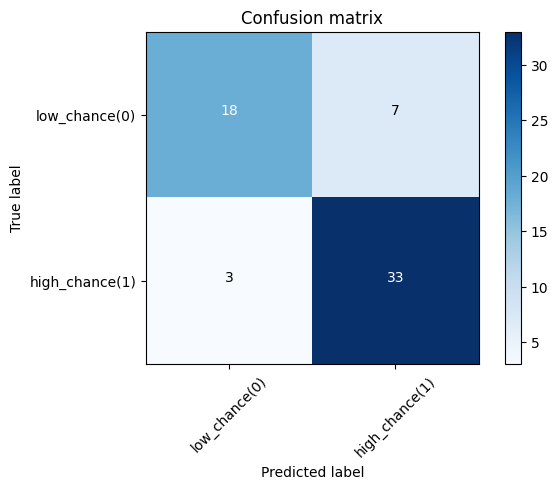

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction_svm, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, prediction_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['low_chance(0)','high_chance(1)'],normalize= False,  title='Confusion matrix')

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, prediction_svm, average='weighted')

0.8332520538695276

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, prediction_svm, pos_label=1)

0.7674418604651163

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
prediction_logreg = logreg.predict(X_test)
prediction_logreg

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
y_test

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
confusion_matrix(y_test,prediction_logreg)

array([[19,  6],
       [ 4, 32]])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        25
           1       0.84      0.89      0.86        36

    accuracy                           0.84        61
   macro avg       0.83      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61

Confusion matrix, without normalization
[[19  6]
 [ 4 32]]


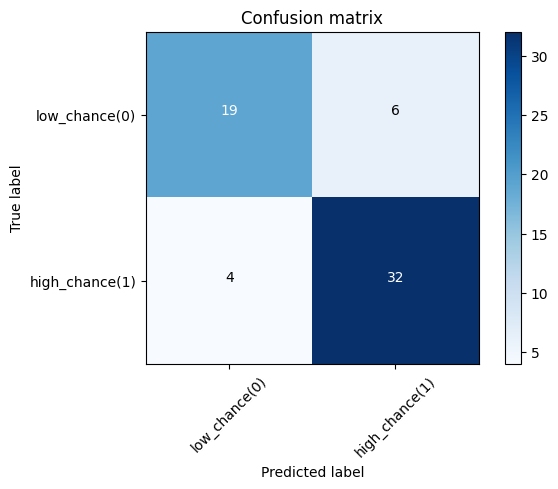

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction_logreg, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, prediction_logreg))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['low_chance(0)','high_chance(1)'],normalize= False,  title='Confusion matrix')

In [ ]:
print(classification_report(y_test,prediction_logreg))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        25
           1       0.84      0.89      0.86        36

    accuracy                           0.84        61
   macro avg       0.83      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, prediction_logreg)

0.8360655737704918

###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
prediction_knn = knn.predict(X_test)
prediction_knn

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
y_test

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
confusion_matrix(y_test, prediction_knn)

array([[21,  4],
       [ 8, 28]])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.72      0.84      0.78        25
           1       0.88      0.78      0.82        36

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

Confusion matrix, without normalization
[[21  4]
 [ 8 28]]


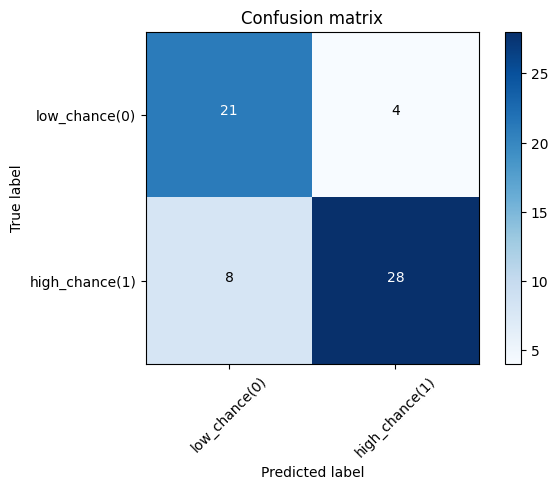

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction_knn, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, prediction_knn))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['low_chance(0)','high_chance(1)'],normalize= False,  title='Confusion matrix')

In [ ]:
accuracy_score(y_test, prediction_knn)

0.8032786885245902

In [ ]:
print(classification_report(y_test, prediction_knn))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78        25
           1       0.88      0.78      0.82        36

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



###Decision Tree classification algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train , y_train)

DecisionTreeClassifier()

In [ ]:
predict_tree = tree.predict(X_test)
predict_tree

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
y_test

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
confusion_matrix(y_test,predict_tree)

array([[23,  2],
       [13, 23]])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.64      0.92      0.75        25
           1       0.92      0.64      0.75        36

    accuracy                           0.75        61
   macro avg       0.78      0.78      0.75        61
weighted avg       0.80      0.75      0.75        61

Confusion matrix, without normalization
[[23  2]
 [13 23]]


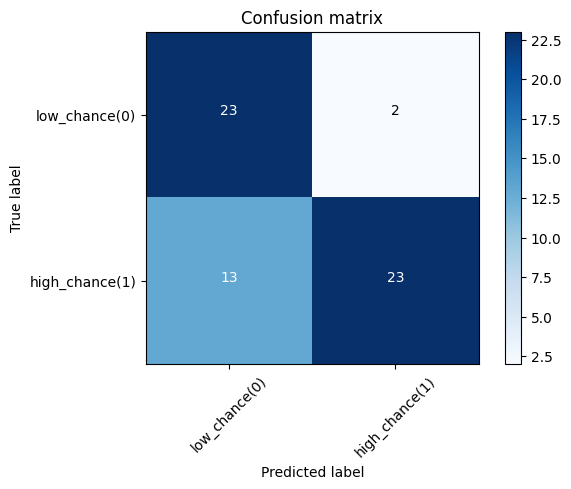

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predict_tree, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test,predict_tree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['low_chance(0)','high_chance(1)'],normalize= False,  title='Confusion matrix')

In [ ]:
accuracy_score(y_test,predict_tree)

0.7540983606557377

In [ ]:

print(classification_report(y_test,predict_tree))


              precision    recall  f1-score   support

           0       0.64      0.92      0.75        25
           1       0.92      0.64      0.75        36

    accuracy                           0.75        61
   macro avg       0.78      0.78      0.75        61
weighted avg       0.80      0.75      0.75        61



###Random Forest classification algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
predict_rf = rf.predict(X_test)
predict_rf

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
y_test

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
confusion_matrix(y_test, predict_rf)

array([[23,  2],
       [ 8, 28]])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        25
           1       0.93      0.78      0.85        36

    accuracy                           0.84        61
   macro avg       0.84      0.85      0.83        61
weighted avg       0.85      0.84      0.84        61

Confusion matrix, without normalization
[[23  2]
 [ 8 28]]


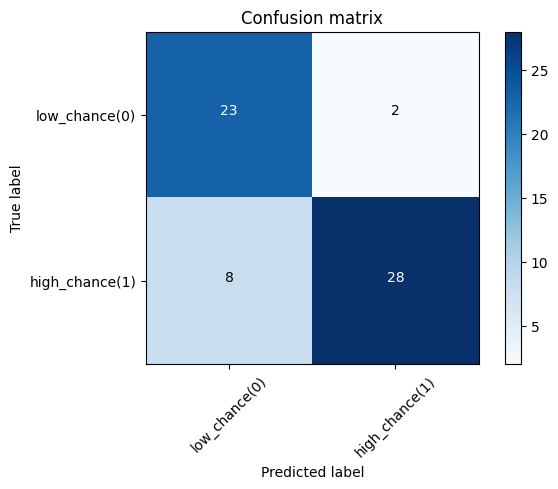

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predict_rf, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, predict_rf))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['low_chance(0)','high_chance(1)'],normalize= False,  title='Confusion matrix')

In [ ]:
accuracy_score(y_test, predict_rf)

0.8360655737704918

In [ ]:
print(classification_report(y_test, predict_rf))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        25
           1       0.93      0.78      0.85        36

    accuracy                           0.84        61
   macro avg       0.84      0.85      0.83        61
weighted avg       0.85      0.84      0.84        61



###Visualization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tabulate import tabulate

In [ ]:
# Assuming 'x' is your feature matrix and 'y' is your target variable, replace them with your actual data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
# Initialize classifiers
logistic_regression = LogisticRegression()
svm_classifier = SVC(kernel='linear')
decision_tree = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()
random_forest = RandomForestClassifier()

In [ ]:
# Fit the models
logistic_regression.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions
lr_predictions = logistic_regression.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)
dt_predictions = decision_tree.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
rf_predictions = random_forest.predict(X_test)

In [ ]:
# Calculate evaluation metrics
precision_scores = [
    precision_score(y_test, lr_predictions),
    precision_score(y_test, svm_predictions),
    precision_score(y_test, dt_predictions),
    precision_score(y_test, knn_predictions),
    precision_score(y_test,rf_predictions)
]

In [ ]:
recall_scores = [
    recall_score(y_test, lr_predictions),
    recall_score(y_test, svm_predictions),
    recall_score(y_test, dt_predictions),
    recall_score(y_test, knn_predictions),
    recall_score(y_test, rf_predictions)
]

In [ ]:
f1_scores = [
    f1_score(y_test, lr_predictions),
    f1_score(y_test, svm_predictions),
    f1_score(y_test, dt_predictions),
    f1_score(y_test, knn_predictions),
    f1_score(y_test, rf_predictions)
]

In [ ]:
accuracy_scores = [
    accuracy_score(y_test, lr_predictions),
    accuracy_score(y_test, svm_predictions),
    accuracy_score(y_test, dt_predictions),
    accuracy_score(y_test, knn_predictions),
    accuracy_score(y_test, rf_predictions)
]

In [ ]:
# Prepare data for tabulate
data = [
    ["Metric", "Logistic Regression", "Support Vector Machine", "Decision Tree Classifier","KNN Classifier","Random Forest"],
    ["Precision", *precision_scores],
    ["Recall", *recall_scores],
    ["F1-Score", *f1_scores],
    ["Accuracy", *accuracy_scores]
]

In [ ]:
# Print the table
print(tabulate(data, tablefmt="fancy_grid", numalign="center", stralign="center"))

╒═══════════╤═════════════════════╤════════════════════════╤══════════════════════════╤════════════════════╤════════════════════╕
│  Metric   │ Logistic Regression │ Support Vector Machine │ Decision Tree Classifier │   KNN Classifier   │   Random Forest    │
├───────────┼─────────────────────┼────────────────────────┼──────────────────────────┼────────────────────┼────────────────────┤
│ Precision │ 0.8421052631578947  │         0.825          │    0.8571428571428571    │       0.875        │       0.9375       │
├───────────┼─────────────────────┼────────────────────────┼──────────────────────────┼────────────────────┼────────────────────┤
│  Recall   │ 0.8888888888888888  │   0.9166666666666666   │    0.6666666666666666    │ 0.7777777777777778 │ 0.8333333333333334 │
├───────────┼─────────────────────┼────────────────────────┼──────────────────────────┼────────────────────┼────────────────────┤
│ F1-Score  │ 0.8648648648648649  │   0.8684210526315789   │           0.75           │ 0.

In [ ]:
data = {
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K Nearest Neighbor','Random Forest'],
    'Accuracy': [0.85, 0.83  ,0.78 , 0.62, 0.86 ]
}

In [ ]:
df = pd.DataFrame(data)
df

,Model,Accuracy
0,Logistic Regression,0.85
1,Support Vector Machine,0.83
2,Decision Tree,0.78
3,K Nearest Neighbor,0.62
4,Random Forest,0.86


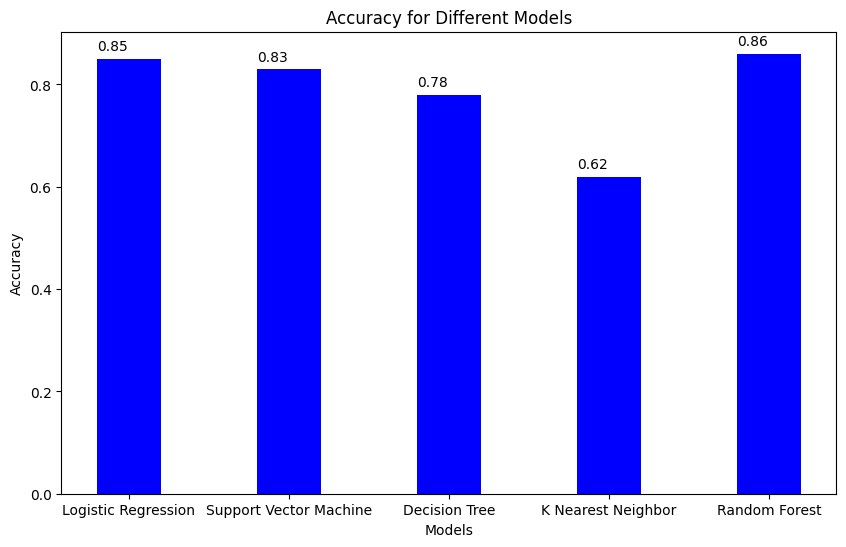

In [ ]:
plt.figure(figsize=(10, 6))
# Adjust the width of the bars
bar_width = 0.4  # You can adjust this value to make the bars even narrower

bars = plt.bar(df['Model'], df['Accuracy'], color='blue', width=bar_width)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Models')

# Add exact numbers on top of each bar
for bar, acc in zip(bars, df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{acc:.2f}', ha='center', va='bottom', color='black')